[[54. 44.]
 [18.  6.]
 [73.  5.]
 [17. 76.]
 [78.  1.]]
[[64.56341212 58.4420699 ]
 [23.73830569 17.98329097]
 [80.34074936 16.23088034]
 [25.63095697 79.2819104 ]
 [98.27071632 14.98883911]]
[3807.24552113    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
[[ 65.71809245  60.73035448]
 [ 27.08347409  22.09162389]
 [ 78.37759201  16.76324705]
 [ 26.35140065  78.50475256]
 [108.29953009  22.51643945]]
[3807.24552113 3642.844

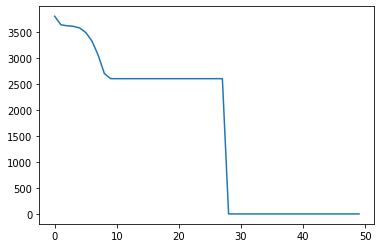

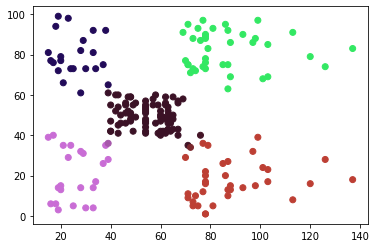

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import preprocessing 
def d(u,v):
  diff=u-v
  return (diff.dot(diff))**0.5

def cost(X,R,M) :
  c=0
  for k in range(len(M)):
    for n in range(len(X)):
      c=c+R[n,k]*d(M[k],X[n])
  return c

def softkmean(X,K,maxiter=50,beta=1.0) :
  N,D=X.shape
  M=np.zeros((K,D))
  R=np.zeros((N,K))
  for k in range(K):
    M[k]=X[np.random.choice(N)]
  print(M)
  costs=np.zeros(maxiter) 
  for i in range(maxiter):
    for k in range(K):
      for n in range(N) :
         R[n,k]=np.exp(-beta*d(X[n],M[k])) /sum(np.exp(-beta*d(X[n],M[j])) for j in range(K)) #responsiblity calculate
    #print(R)

    for k in range(K) :
      M[k]=R[:,k].dot(X) / R[:,k].sum()
    print(M)
    
    costs[i]=cost(X,R,M)
    print(costs)
    if i> 0:
        if np.abs(costs[i]-costs[i-1] ) <0.00000001: #acting as a tolerance level
          break
  plt.plot(costs)
  plt.show()
  #print(M)
  

  randomcolor=np.random.random((K,3))
  colors=R.dot(randomcolor)
  plt.scatter(X[:,0],X[:,1],c=colors)


df= pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
#min_max_scaler = preprocessing.MinMaxScaler()
#X1 = min_max_scaler.fit_transform(X)           #tip check by putting X1 and you will realise that why you shoulnot scale the data for clustering
softkmean(X,5)
     


In [ ]:
from google.colab import drive
drive.mount('/content/drive')